In [ ]:
# ECGR 4105 HW4: Support Vector Machines
# Author: Lucas Therrien
# Student ID #801122089
# GitHub Link: https://github.com/lucastherrien/ECGR4105HW4

In [ ]:
##_________________________________________##
## Setup
##_________________________________________##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
import seaborn as sns
from matplotlib.colors import ListedColormap
#Suppress all warnings because they annoy me
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [3]:
# Load Cancer Data
can = load_breast_cancer()
x = can.data
y = can.target

In [3]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [4]:
# Test/train split (80 % train, 20 % test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
C = [100, 10, 1, .1, .001]
best_C = 0
best_acc = 0

for c in C:
    svc = SVC(kernel='linear',C=c)
    svc.fit(x_train,y_train)
    train_accuracy = svc.score(x_train,y_train)
    val_accuracy = svc.score(x_test,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_C = c
    print('C: ',c)
    print('training accuracy:',train_accuracy)
    print('validation accuracy:',val_accuracy)
    print('')

K = [1, 5, 10, 20, 25]
best_K = 0
best_acc = 0

for k in K:
    pca = PCA(n_components=k, svd_solver = "auto")
    x_train_pca = pca.fit_transform(x_train)
    pca = PCA(n_components=k, svd_solver = "auto")
    x_test_pca = pca.fit_transform(x_test)
    svc = SVC(kernel='linear',C=best_C)
    svc.fit(x_train_pca,y_train)
    train_accuracy = svc.score(x_train_pca,y_train)
    val_accuracy = svc.score(x_test_pca,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_K = k
    print('K: ',k)
    print('training accuracy:',train_accuracy)
    print('validation accuracy:',val_accuracy)
    preds = svc.predict(x_test_pca)
    cr = classification_report(y_test,preds)
    print(cr)
    print('')

pca = PCA(n_components=best_K, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=best_K, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svc = SVC(kernel='linear',C=best_C)
svc.fit(x_train_pca,y_train)
train_accuracy = svc.score(x_train_pca,y_train)
val_accuracy = svc.score(x_test_pca,y_test)
print('Best C:',best_C)
print('Best K:',best_K)
print('best model training accuracy:',train_accuracy)
print('best model validation accuracy:',val_accuracy)

C:  100
training accuracy: 0.967032967032967
validation accuracy: 0.9824561403508771

C:  10
training accuracy: 0.9758241758241758
validation accuracy: 0.9736842105263158

C:  1
training accuracy: 0.9648351648351648
validation accuracy: 0.9649122807017544

C:  0.1
training accuracy: 0.9494505494505494
validation accuracy: 0.9649122807017544

C:  0.001
training accuracy: 0.9406593406593406
validation accuracy: 0.9473684210526315

K:  1
training accuracy: 0.8989010989010989
validation accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.92      0.95      0.94        77

    accuracy                           0.91       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114


K:  5
training accuracy: 0.9428571428571428
validation accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0    

In [19]:
pca = PCA(n_components=1, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=1, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svc = SVC(kernel='rbf',C=best_C)
svc.fit(x_train_pca,y_train)
train_accuracy = svc.score(x_train_pca,y_train)
val_accuracy = svc.score(x_test_pca,y_test)
print('rbf: ')
print('training accuracy:',train_accuracy)
print('validation accuracy:',val_accuracy)
preds = svc.predict(x_test_pca)
cr = classification_report(y_test,preds)
print(cr)
print('')
pca = PCA(n_components=10, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=10, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svc = SVC(kernel='poly',C=best_C)
svc.fit(x_train_pca,y_train)
train_accuracy = svc.score(x_train_pca,y_train)
val_accuracy = svc.score(x_test_pca,y_test)
print('poly: ')
print('training accuracy:',train_accuracy)
print('validation accuracy:',val_accuracy)
preds = svc.predict(x_test_pca)
cr = classification_report(y_test,preds)
print(cr)
print('')
pca = PCA(n_components=10, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=10, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svc = SVC(kernel='sigmoid',C=best_C)
svc.fit(x_train_pca,y_train)
train_accuracy = svc.score(x_train_pca,y_train)
val_accuracy = svc.score(x_test_pca,y_test)
print('sigmoid: ')
print('training accuracy:',train_accuracy)
print('validation accuracy:',val_accuracy)
preds = svc.predict(x_test_pca)
cr = classification_report(y_test,preds)
print(cr)
print('')

rbf: 
training accuracy: 0.9032967032967033
validation accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.92      0.95      0.94        77

    accuracy                           0.91       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114


poly: 
training accuracy: 0.8725274725274725
validation accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        37
           1       0.90      1.00      0.94        77

    accuracy                           0.92       114
   macro avg       0.95      0.88      0.90       114
weighted avg       0.93      0.92      0.92       114


sigmoid: 
training accuracy: 0.8549450549450549
validation accuracy: 0.8508771929824561
              precision    recall  f1-score   support

           0       0.74      0.8

In [ ]:
# the best SVC classifier had a 3 percent lower f1 accuracy score as compared to the
# best logistic regression classifier from homework 3

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [3]:
hd = pd.read_csv('Housing.csv')
hd.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [5]:
# Output variable (housing price)
y = hd[['price']]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
def compute_loss(y, preds): 
    errors = np.subtract(preds, y)
    sqrErrors = np.square(errors)
    loss = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return loss

K:  1
0    1.035200e+12
dtype: float64

K:  3
0    8.930591e+11
dtype: float64

K:  5
0    8.744636e+11
dtype: float64

K:  10
0    8.743282e+11
dtype: float64

K:  11
0    8.747254e+11
dtype: float64

Best K: 10
best model training accuracy: 0.3640167161010823
best model validation accuracy: 0.4572878008510938


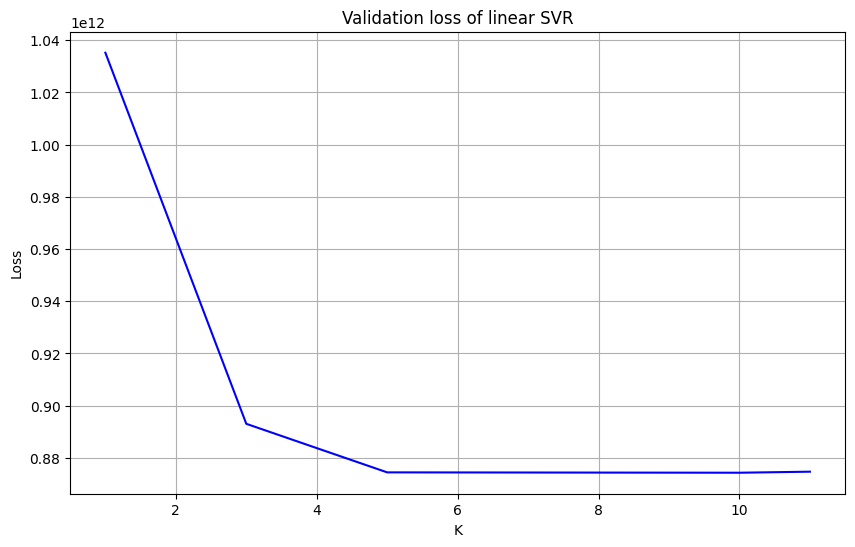

In [23]:
K = [1, 3, 5, 10, 11]
best_K = 0
best_acc = 0

losses = [0,0,0,0,0]
i = 0

for k in K:
    pca = PCA(n_components=k, svd_solver = "auto")
    x_train_pca = pca.fit_transform(x_train)
    pca = PCA(n_components=k, svd_solver = "auto")
    x_test_pca = pca.fit_transform(x_test)
    svr = SVR(kernel='linear',C=1e3)
    svr.fit(x_train_pca,y_train)
    train_accuracy = svr.score(x_train_pca,y_train)
    val_accuracy = svr.score(x_test_pca,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_K = k
    print('K: ',k)
    preds = pd.DataFrame(svr.predict(x_test_pca))
    #print(preds)
    #print(y_test)
    losses[i] = compute_loss(y_test,preds)
    print(losses[i])
    i = i+1
    print('')

plt.plot(K, losses, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K') 
plt.ylabel('Loss') 
plt.title('Validation loss of linear SVR')

print('Best K:',best_K)
pca = PCA(n_components=best_K, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=best_K, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svr = SVR(kernel='linear',C=1e3)
svr.fit(x_train_pca,y_train)
train_accuracy = svr.score(x_train_pca,y_train)
val_accuracy = svr.score(x_test_pca,y_test)
print('best model training accuracy:',train_accuracy)
print('best model validation accuracy:',val_accuracy)

In [29]:
print('rbf')
pca = PCA(n_components=best_K, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=best_K, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svr = SVR(kernel='rbf',C=1e3,gamma=0.1)
svr.fit(x_train_pca,y_train)
train_accuracy = svr.score(x_train_pca,y_train)
val_accuracy = svr.score(x_test_pca,y_test)
print('training accuracy:',train_accuracy)
print('validation accuracy:',val_accuracy)
preds = pd.DataFrame(svr.predict(x_test_pca))
loss = compute_loss(y_test,preds)
print('loss',loss)
print('')
print('poly')
pca = PCA(n_components=best_K, svd_solver = "auto")
x_train_pca = pca.fit_transform(x_train)
pca = PCA(n_components=best_K, svd_solver = "auto")
x_test_pca = pca.fit_transform(x_test)
svr = SVR(kernel='poly',C=1e3,degree=2)
svr.fit(x_train_pca,y_train)
train_accuracy = svr.score(x_train_pca,y_train)
val_accuracy = svr.score(x_test_pca,y_test)
print('training accuracy:',train_accuracy)
print('validation accuracy:',val_accuracy)
preds = pd.DataFrame(svr.predict(x_test_pca))
loss = compute_loss(y_test,preds)
print('loss',loss)
print('')

rbf
training accuracy: -0.01687150613552091
validation accuracy: -0.03860158790083634
loss 0    1.673223e+12
dtype: float64

poly
training accuracy: -0.015069218558567465
validation accuracy: 0.026646094662367226
loss 0    1.568107e+12
dtype: float64



In [ ]:
# the regularized linear regression model from homework 1 had orders of magnitude less
# loss compared to even the best SVR model, perhaps normalizing the data here would have help